# Praktikum 6 - Evaluation in Information Retrieval

### Evaluasi untuk Unranked Retrieve Set

In [1]:
top_3 = {'doc7': 0.7689768599816609, 'doc1': 0.4641504133851462, 'doc4': 0.35626622628022314}
rel_judgement1 = {'doc1':1, 'doc2':0, 'doc3':0, 'doc4':1, 'doc5':1, 'doc6':0, 'doc7':1, 'doc8':1, 'doc9':0, 'doc10':0}
rel_docs = []
for doc_id, rel in rel_judgement1.items():
    if rel==1:
        rel_docs.append(doc_id)
retrieved_rel_doc3 = [value for value in list(top_3.keys()) if value in rel_docs]
prec3 = len(retrieved_rel_doc3)/len(top_3)*100
rec3 = len(retrieved_rel_doc3)/len(rel_docs)*100
fScore3 = 2 * prec3 * rec3 / (prec3 + rec3)
print(prec3, rec3, fScore3)


100.0 60.0 75.0


In [4]:
top_5 = {'doc7': 0.7689768599816609, 'doc1': 0.4641504133851462, 'doc4': 0.35626622628022314, 'doc3': 0.10856998991379904, 'doc6': 0.10856998991379904}
rel_judgement1 = {'doc1':1, 'doc2':0, 'doc3':0, 'doc4':1, 'doc5':1, 'doc6':0, 'doc7':1, 'doc8':1, 'doc9':0, 'doc10':0}
rel_docs = []
for doc_id, rel in rel_judgement1.items():
    if rel==1:
        rel_docs.append(doc_id)
retrieved_rel_doc5 = [value for value in list(top_5.keys()) if value in rel_docs]
prec5 = len(retrieved_rel_doc5)/len(top_5)*100
rec5 = len(retrieved_rel_doc5)/len(rel_docs)*100
fScore5 = 2 * prec5 * rec5 / (prec5 + rec5)
print(prec5, rec5, fScore5)


60.0 60.0 60.0


### Evaluasi untuk Ranked Retrieveal Set

In [5]:
import numpy as np
def compute_prf_metrics(I, score, I_Q):
     """Compute precision, recall, F-measures and other evaluation metrics for document-level retrieval
     Args:
     I (np.ndarray): Array of items
     score (np.ndarray): Array containing the score values of the times
     I_Q (np.ndarray): Array of relevant (positive) items
     Returns:
     P_Q (float): Precision
     R_Q (float): Recall
     F_Q (float): F-measures sorted by rank
     BEP (float): Break-even point
     F_max (float): Maximal F-measure
     P_average (float): Mean average
     X_Q (np.ndarray): Relevance function
     rank (np.ndarray): Array of rank values
     I_sorted (np.ndarray): Array of items sorted by rank
     rank_sorted (np.ndarray): Array of rank values sorted by rank
     """
     # Compute rank and sort documents according to rank
     K = len(I)
     index_sorted = np.flip(np.argsort(score))
     I_sorted = I[index_sorted]
     rank = np.argsort(index_sorted) + 1
     rank_sorted = np.arange(1, K+1)
     
    # Compute relevance function X_Q (indexing starts with zero)
     X_Q = np.isin(I_sorted, I_Q)
     # Compute precision and recall values (indexing starts with zero)
     M = len(I_Q)
     P_Q = np.cumsum(X_Q) / np.arange(1, K+1)
     R_Q = np.cumsum(X_Q) / M
    
    # Break-even point
     BEP = P_Q[M-1]
     # Maximal F-measure
     sum_PR = P_Q + R_Q
     sum_PR[sum_PR == 0] = 1 # Avoid division by zero
     F_Q = 2 * (P_Q * R_Q) / sum_PR
     F_max = F_Q.max()
    
     # Average precision
     P_average = np.sum(P_Q * X_Q) / len(I_Q)
     return P_Q, R_Q, F_Q, BEP, F_max, P_average, X_Q, rank, I_sorted, rank_sorted


In [12]:
import pandas as pd
relevance_score1 = {'doc1': 0.4641504133851462, 'doc2': 0.0, 'doc3': 0.10856998991379904, 'doc4': 0.35626622628022314, 'doc5': 0.10705617011820337, 'doc6': 0.10856998991379904,'doc7': 0.7689768599816609, 'doc8': 0.08967792817935699, 'doc9': 0.0, 'doc10': 0.0}
I = np.array(list(relevance_score1.keys()))
score = np.array(list(relevance_score1.values()))
I_Q = np.array(['doc1', 'doc4', 'doc5', 'doc7', 'doc8'])
output = compute_prf_metrics(I, score, I_Q)
P_Q, R_Q, F_Q, BEP, F_max, P_average, X_Q, rank, I_sorted, rank_sorted = output
# Arrange output as tables
score_sorted = np.flip(np.sort(score))
df = pd.DataFrame({'Rank': rank_sorted, 'ID': I_sorted,
                   'Score': score_sorted,
                   '$\chi_\mathcal{Q}$': X_Q, 
                   'P(r)': P_Q, 
                   'R(r)': R_Q,
                   'F(r)': F_Q})
print(df)
print('Break-even point = %.2f' % BEP)
print('F_max = %.2f' % F_max)
print('Average precision =', np.round(P_average, 5))


   Rank     ID     Score  $\chi_\mathcal{Q}$      P(r)  R(r)      F(r)
0     1   doc7  0.768977                True  1.000000   0.2  0.333333
1     2   doc1  0.464150                True  1.000000   0.4  0.571429
2     3   doc4  0.356266                True  1.000000   0.6  0.750000
3     4   doc6  0.108570               False  0.750000   0.6  0.666667
4     5   doc3  0.108570               False  0.600000   0.6  0.600000
5     6   doc5  0.107056                True  0.666667   0.8  0.727273
6     7   doc8  0.089678                True  0.714286   1.0  0.833333
7     8  doc10  0.000000               False  0.625000   1.0  0.769231
8     9   doc9  0.000000               False  0.555556   1.0  0.714286
9    10   doc2  0.000000               False  0.500000   1.0  0.666667
Break-even point = 0.60
F_max = 0.83
Average precision = 0.87619


In [43]:
from matplotlib import pyplot as plt

def plot_PR_curve(P_Q, R_Q, figsize=(3, 3)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    plt.plot(R_Q, P_Q, linestyle='--', marker='o', color='k', mfc='r')
    plt.xlim([0, 1.1])
    plt.ylim([0, 1.1])
    ax.set_aspect('equal', 'box')
    plt.title('PR curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.tight_layout()
    ax.plot(BEP, BEP, color='green', marker='o', fillstyle='none', markersize=15)
    ax.set_title('PR curve')
    plt.show()
    return fig, ax

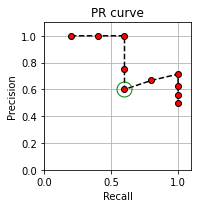

(<Figure size 216x216 with 1 Axes>,
 <AxesSubplot: title={'center': 'PR curve'}, xlabel='Recall', ylabel='Precision'>)

In [45]:
plot_PR_curve(P_Q, R_Q, figsize = (3,3))